In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
from pandas_profiling import ProfileReport
import numpy as np
from sklearn.linear_model import LinearRegression

In [50]:
file = pd.read_csv("Advertising.csv")
print(file)
file.rename(columns = {'sales':'Actual Sales'}, inplace = True) # changing the name of sales columns to 'Actual Sales'
file

     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


Unnamed: 0     TV  radio  newspaper  Actual Sales
0             1  230.1   37.8       69.2          22.1
1             2   44.5   39.3       45.1          10.4
2             3   17.2   45.9       69.3           9.3
3             4  151.5   41.3       58.5          18.5
4             5  180.8   10.8       58.4          12.9
..          ...    ...    ...        ...           ...
195         196   38.2    3.7       13.8           7.6
196         197   94.2    4.9        8.1           9.7
197         198  177.0    9.3        6.4          12.8
198         199  283.6   42.0       66.2          25.5
199         200  232.1    8.6        8.7          13.4

[200 rows x 5 columns]

In [12]:
y = file[['Actual Sales']]
y

Actual Sales
0            22.1
1            10.4
2             9.3
3            18.5
4            12.9
..            ...
195           7.6
196           9.7
197          12.8
198          25.5
199          13.4

[200 rows x 1 columns]

In [13]:
df = pd.DataFrame(file)
df.describe() # displaying a short description of the data in the dataset.

Unnamed: 0          TV       radio   newspaper  Actual Sales
count  200.000000  200.000000  200.000000  200.000000    200.000000
mean   100.500000  147.042500   23.264000   30.554000     14.022500
std     57.879185   85.854236   14.846809   21.778621      5.217457
min      1.000000    0.700000    0.000000    0.300000      1.600000
25%     50.750000   74.375000    9.975000   12.750000     10.375000
50%    100.500000  149.750000   22.900000   25.750000     12.900000
75%    150.250000  218.825000   36.525000   45.100000     17.400000
max    200.000000  296.400000   49.600000  114.000000     27.000000

In [14]:
df.profile_report()

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Dataset Observations:

1. No dataset is missing since count = 200 in all of the columns.

2. There are no duplicate rows.

3. TV-SALES are correlated.

4. NEWSPAPER-SALES are correlated.

5. RADIO-SALES are correlated.

In [38]:
# Tv vs. Sales:
x1 = file[['TV']]
lm1 = LinearRegression()
lm1.fit(x1,y)
lm1.intercept_
lm1.coef_
lm1.score(x1,y) 

0.611875050850071

The score is 61.19%.

In [39]:
add = lm1.predict(file[['TV']])
new_f = pd.read_csv("Advertising.csv")
new_f.rename(columns = {'sales':'Actual Sales'}, inplace = True)
new_f['Predicted Sales'] = add
new_f = new_f.drop(['Unnamed: 0','radio','newspaper'],axis=1)
new_f.to_csv("Tv Sales Prediction.csv")

In [40]:
%matplotlib inline
plt.xlabel("TV")
plt.ylabel("Sales Prediction")
plt.scatter(x1,y,color="red",marker = "+")
plt.plot(df.TV,lm1.predict(file[['TV']]),color="blue")
plt.savefig('TV Sales prediction.png')
# Shows the Linear Regression line as blue after prediction of prices. 

In [41]:
# Newspaper vs. Sales:
x2 = file[['newspaper']]
lm2 = LinearRegression()
lm2.fit(x2,y)
lm2.intercept_
lm2.coef_
lm2.score(x2,y)

0.05212044544430516

The score is 5.21%.

In [42]:
add = lm2.predict(file[['newspaper']])
new_f = pd.read_csv("Advertising.csv")
new_f.rename(columns = {'sales':'Actual Sales'}, inplace = True)
new_f['Sales Prediction'] = add
new_f = new_f.drop(['Unnamed: 0','radio','TV'],axis=1)
new_f.to_csv("Newpaper Sales Prediction.csv")

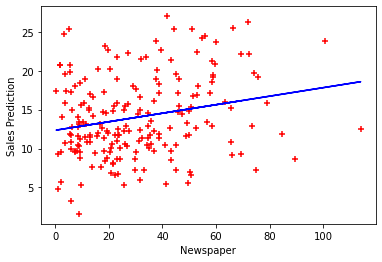

In [43]:
%matplotlib inline
plt.xlabel("Newspaper")
plt.ylabel("Sales Prediction")
plt.scatter(x2,y,color="red",marker = "+")
plt.plot(df.newspaper,lm2.predict(file[['newspaper']]),color="blue")
plt.savefig('Newspaper Sales prediction.png')
# shows the linear reg line as blue after prediction of prices. 

In [44]:
# Radio vs. Sales:
x3 = file[['radio']]
lm3 = LinearRegression()
lm3.fit(x3,y)
lm3.intercept_
lm3.coef_
lm3.score(x3,y)

0.33203245544529525

The score is 33.20%.

In [45]:
add = lm3.predict(file[['radio']])
new_f = pd.read_csv("Advertising.csv")
new_f.rename(columns = {'sales':'Actual Sales'}, inplace = True)
new_f['Sales Prediction'] = add
new_f = new_f.drop(['Unnamed: 0','newspaper','TV'],axis=1)
new_f.to_csv("Radio Sales Prediction.csv")

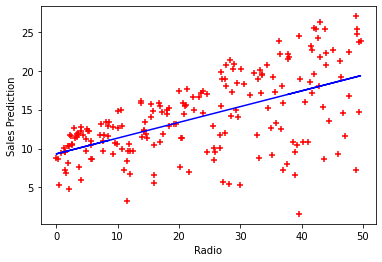

In [46]:
%matplotlib inline
plt.xlabel("Radio")
plt.ylabel("Sales Prediction")
plt.scatter(x3,y,color="red",marker = "+")
plt.plot(df.radio,lm3.predict(file[['radio']]),color="blue")
plt.savefig('Radio Sales prediction.png')
# shows the linear reg line as blue after prediction of prices. 